# General Ideas
The task of this work is to locate the most likely locations where the excellent candidate may live, so that the company can send their recruiters to find her without wasting time or money. From the description of the question, we understood that the probability that the candidate live at a certain point is given by three unrelated probability distributions. Naturally, we are thinking to form a mixture probability distribution which could combine and represent the three individual distributions together. And then the locations where corresponded to the the maximum value in this mixture distruibution could give us an idea of where the candidate may live.

The methods to combine the probability from different distributions could be vairous and depends on conditons. From the book in [], one approach would be that the mixture distributions could be formulated by taking linear combinations of more basic distributions. Therefore, we consider the mixture probability desity function $P(X)$ of form as
$$P(X) = \sum_{i=1}^{N} {\pi_{i}\cdot p_i(X)} $$
where $N$ is the number of basic probability distributions, $p_i(X)$ is <em>ith</em> basic density function and the paramater $\pi_{i}$ is the corresponding coefficients. The parameter $\pi$ could also be understand as the <em>Priori probability </em> which indicates the probability that the random variable $X$ falls into the each basic distribution. For this reason, we can obtain that 
$$\sum_{i=1}^{N} {\pi_{i} =1}, 0 \leqslant p(X) \leqslant 1 $$

Back to this questions, we have three independent probability distributions. The first distribution is a normal distributions according to the shortest distance to river spree which could be denoted by $\mathcal{N}(\mu,\,\sigma^2)$. The second distribution is a log-normal distribution denoted by $\ln\mathcal{N}(\mu,\,\sigma^2)$ according to the shortest distance to the Brandenburg Gate. And the last one is also a normal distribution $\mathcal{N_3}(\mu,\,\sigma^2)$ according to the shortest distance to a satellite path. Since there is not enough information to calculate the parameter $\pi$ for each individual distribution, we made an assumption that the three distributions are equally important. So we get 
$$\pi_1 = \pi_2 = \pi_3 \quad and \quad \pi_1 + \pi_2 + \pi_3 = 1 \\ $$
In this case, we get the value of the coefficients $\pi_1 = \pi_2 = \pi_3 = \frac{1}{3}$. Finally, we could combine and represent the mixture probability density function for any given location (x,y) as following:
$$
P(x, y) = \pi_1\cdot f_1(d_1(x,y)))+\pi_2\cdot f_2(d_2(x,y)))+\pi_3\cdot f_3(d_3(x,y))) \\
=\frac{1}{3}\mathcal{N_1}(\mu,\,\sigma^2)+\frac{1}{3}\ln\mathcal{N_2}(\mu,\,\sigma^2)+\frac{1}{3}\mathcal{N_3}(\mu,\,\sigma^2)$$

The last step is to compute the maximum value for the mixture density function and the find the corresponding location. There will be many mathmatic considerations for calculating the maximum value from complex probability density function. We could invert the value of the complex probability function from positive space into the negative space and translate this problem to an optimization problem. The gradient descent algorithm is a widely used method to find a local minimum of a given objective function. By saying local minimum, we mean the algorithm may converge into a local minimum depending on the starting points. This local minimun makes no guarantee that it will be also the global minimum value. Luckily in this question, we can plot the probability density function of the interesting area and find all the local minimum values by carefully choose the starting point. After that, we can quickly pick the global minimum value from the local minimum list.


 # Coding
 We are trying to solve this problem using Python language.
 Firstly, we wrote the function to convert between the GPS coordinates and XY coordinates.

In [8]:
SW_lat = 52.464011 #(Latitude)
SW_lon = 13.274099 #(Longitude)

def gps_2_xy(P_lat, P_lon):
    P_x = (P_lon - SW_lon) * math.cos(SW_lat * math.pi / 180) * 111.323
    P_y = (P_lat - SW_lat) * 111.323

    return P_x, P_y

def xy_2_gps(x, y):

    P_lon= + SW_lon - x /(111.323 * math.cos(SW_lat))
    P_lat= (y / 111.323) + SW_lat

    return round(P_lat, 6),round(P_lon, 6)

After converting the data into XY coordinates, we now wokring on calculate the shortest distance between a point or a line segement. Credits to the work in <a href="http://www.fundza.com/vectors/point2line/index.html">tutorial</a>, we can wrote a function to calculte the shortest distance.

In [9]:
import math
  
def dot(v,w):
    x,y,z = v
    X,Y,Z = w
    return x*X + y*Y + z*Z
  
def length(v):
    x,y,z = v
    return math.sqrt(x*x + y*y + z*z)
  
def vector(b,e):
    x,y,z = b
    X,Y,Z = e
    return (X-x, Y-y, Z-z)
  
def unit(v):
    x,y,z = v
    mag = length(v)
    return (x/mag, y/mag, z/mag)
  
def distance(p0,p1):
    return length(vector(p0,p1))
  
def scale(v,sc):
    x,y,z = v
    return (x * sc, y * sc, z * sc)
  
def add(v,w):
    x,y,z = v
    X,Y,Z = w
    return (x+X, y+Y, z+Z)

def distance_to_linesegment(pnt, start, end):
    """
    Calculate the shortest distance between a point and a line segment.
    >>> distance_to_linesegment([0, 0, 0], [1, 0, 0], [1, 1, 0])
    1.0
    >>> distance_to_linesegment([0, 0, 0], [1, 0, 0],[0, 1, 0])
    0.7071067811865476
    """
    line_vec = vector(start, end)
    pnt_vec = vector(start, pnt)
    line_len = length(line_vec)
    line_unitvec = unit(line_vec)
    pnt_vec_scaled = scale(pnt_vec, 1.0/line_len)
    t = dot(line_unitvec, pnt_vec_scaled)
    if t < 0.0:
        t = 0.0
    elif t > 1.0:
        t = 1.0
    nearest = scale(line_vec, t)
    dist = distance(nearest, pnt_vec)
    return dist

Now we can work on presenting the three distributions for a given point (x, y).

In [15]:
import numpy as np
from scipy import stats

#The spree river could be represented with line segments 
# between the following coordinates
SPREE_GPS = [
    [52.529198,13.274099], [52.531835,13.29234], [52.522116,13.298541],
    [52.520569,13.317349], [52.524877,13.322434], [52.522788,13.329],
    [52.517056,13.332075], [52.522514,13.340743], [52.517239,13.356665],
    [52.523063,13.372158], [52.519198,13.379453], [52.522462,13.392328],
    [52.520921,13.399703], [52.515333,13.406054], [52.514863,13.416354],
    [52.506034,13.435923], [52.496473,13.461587], [52.487641,13.483216],
    [52.488739,13.491456], [52.464011,13.503386]]

GATE_GPS = [52.516288, 13.377689]

SATELLITE_START_GPS = [52.590117, 13.39915]
SATELLITE_END_GPS = [52.437385, 13.553989]

def convert_spree(spree_coords):

    XY_coords = []
    for GPS_coord in spree_coords:
        P_x, P_y = gps_2_xy(GPS_coord[0], GPS_coord[1])
        XY_coords.append([P_x, P_y])

    return XY_coords

def spree_distribution(x,y, mean= 0.0, sigma = 2.73 / 1.96):
    SPREE_coords = []
    for GPS_coord in SPREE_GPS:
        P_x, P_y = gps_2_xy(GPS_coord[0], GPS_coord[1])
        SPREE_coords.append([P_x, P_y, 0])
    distances = []
    idx = 0
    for idx in range(len(SPREE_coords)-1):
        start_point = SPREE_coords[idx]
        end_point = SPREE_coords[idx+1]
        distances.append(distance_to_linesegment([x,y,0], start_point, end_point))
    shortest_distance = min(distances)
    return stats.norm(mean, sigma).pdf(shortest_distance)


def gate_distribution(x, y, mean = 4.7, mode = 3.877):
    GATE_coord = gps_2_xy(GATE_GPS[0], GATE_GPS[1])
    shortest_distance = length(vector([GATE_coord[0], GATE_coord[1],0], [x, y, 0]))
    theta = math.sqrt(2 * math.log(mean/mode)/3)
    sigma = (2 * math.log(mean) + math.log(mode))/3
    return stats.lognorm(s=theta, scale=math.exp(sigma)).pdf(shortest_distance)


def satellite_distribution(x, y, mean= 0.0, sigma= 2.4 / 1.96):
    start_coord = gps_2_xy(SATELLITE_START_GPS[0], SATELLITE_START_GPS[1])
    end_coord = gps_2_xy(SATELLITE_END_GPS[0], SATELLITE_END_GPS[1])

    shortest_distance = distance_to_linesegment([x,y,0], [start_coord[0], 
                                                          start_coord[1], 0], [end_coord[0], end_coord[1], 0])
    return stats.norm(mean, sigma).pdf(shortest_distance)

We wrote an function to visualize the probability density function in XY coordinates. In the figures, the dash dot line is the spree river. The green diamond represents the Brandenburg Gate. And the dashed yellow line is the satellite path.

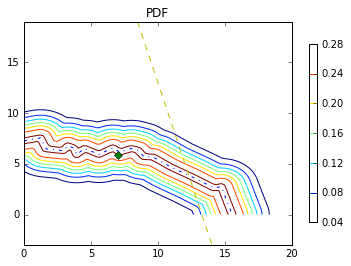

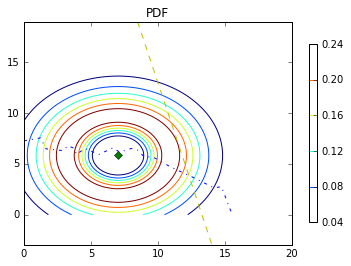

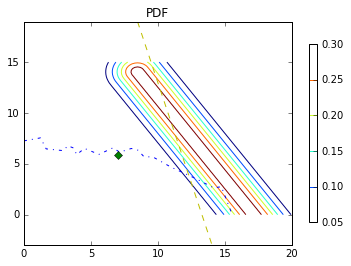

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline 

def draw_2D_plot(pdf, peak_points=[]):
    # display predicted scores by the model as a contour plot
    x = np.linspace(0.0, 20.0, 100)
    y = np.linspace(0.0, 15.0, 75)
    X, Y = np.meshgrid(x, y)
    XX = np.array([X.ravel(), Y.ravel()]).T

    probs = np.zeros(7500)

    idx=0
    for point in XX:
        probs[idx] = pdf(point[0], point[1])
        idx = idx+1

    probs = probs.reshape((75, 100));

    CS = plt.contour(X, Y, probs);
    CB = plt.colorbar(CS, shrink=0.8, extend='both')

    spree_coords = convert_spree(SPREE_GPS)
    spree_coords = np.asarray(spree_coords)
    plt.plot(spree_coords[:, 0], spree_coords[:, 1], '-.')

    GATE_coord = gps_2_xy(GATE_GPS[0], GATE_GPS[1])
    plt.plot(GATE_coord[0], GATE_coord[1], 'gD')

    start_coord = gps_2_xy(SATELLITE_START_GPS[0], SATELLITE_START_GPS[1])
    end_coord = gps_2_xy(SATELLITE_END_GPS[0], SATELLITE_END_GPS[1])
    plt.plot([start_coord[0], start_coord[1]], [end_coord[0], end_coord[1]], color='y', ls='--', lw=1)

    for peak_point in peak_points:
        plt.plot(peak_point[0], peak_point[1], 'ro')
        
    plt.axis([-1, 20, -1, 10])

    plt.title('PDF')
    plt.axis('tight')
    plt.show()
    
draw_2D_plot(spree_distribution)
draw_2D_plot(gate_distribution)
draw_2D_plot(satellite_distribution)

Once we get the three individual distributions, we could work on the mixture distributions with linear combinations

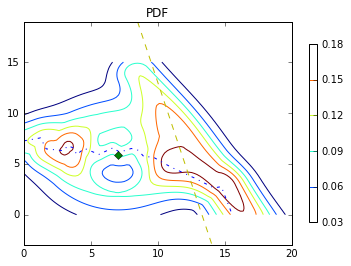

In [19]:
def mixture_distribution(x, y):
    return 1.0/3 * spree_distribution(x, y) + 1.0/3 * gate_distribution(x, y) + 1.0/3 * satellite_distribution(x, y)
draw_2D_plot(mixture_distribution)

We can observe that there are 

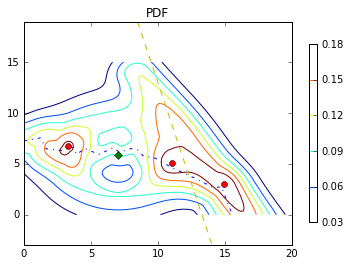

In [24]:
from scipy import optimize

def objective_function(x):
     return -mixture_distribution(x[0],x[1])

peak_point1 = optimize.minimize(objective_function, [15.02, 2.86], method='Nelder-Mead').x
peak_point2 = optimize.minimize(objective_function, [3.12, 6.52], method='Nelder-Mead').x
peak_point3 = optimize.minimize(objective_function, [11.50, 5.4], method='Nelder-Mead').x

peak_points = [peak_point1, peak_point2, peak_point3]

draw_2D_plot(mixture_distribution, peak_points)

GPS visualization on google map, we find this <a href="https://github.com/vgm64/gmplot">library</a> which could plot data on Google Maps. So we wrote this function to draw a easy to read map for recuriters.

In [27]:
import gmplot

BERLIN_GPS =[ 52.5167, 13.3833]

def draw_on_google_map(map_center, peak_coords):

    gmap = gmplot.GoogleMapPlotter(map_center[0], map_center[1], 13)

    peak_coords = np.asarray(peak_coords);
    gmap.heatmap(peak_coords[:,0], peak_coords[:,1], radius=100, opacity=0.5, 
                 gradient=[(50,50,50,0), (255,0,0,1), (255, 0, 0, 1)])

    gmap.draw("easy_to_read_map.html")

peak_coords = [xy_2_gps(peak_point1[0],peak_point1[1]), 
               xy_2_gps(peak_point2[0], peak_point2[1]), 
               xy_2_gps(peak_point3[0], peak_point3[1])]
draw_on_google_map(BERLIN_GPS, peak_coords)

<iframe src="file:///Users/zhenxingzhang/Documents/py2ml/Data/easy_to_read_map.html" width="100" height="100"></iframe>
